

# Project: Investigate weather a patient will show up or not, based brazilian health data
<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In here, we'll analyse Brazil's medical appointment data and weather the patient went or no. In this dataset we have info about some diseases the patient have, weather show up or no, gender, age, weather received SMS or not. With all these data, we'll try to understand what makes a patiente go or not.
>
#### For this analysis I have the following questions: 
>
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>
>- A) Do people with more scholarship/Bolsa Família tend to show to medical appointment?
>
>- B) Which group age tend to go to the medical appointment?
>   
>- C) What is the rate of people that recived SMS and went to the medical appointment?

_____________________________________________________________________________________________________________________________

### First, let's import the necessary libraries, set the path.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline 


os.chdir('C:/Users/Rodrigo/Desktop/Scripts-Python/Nanodegree/projeto2')
df = pd.read_csv("C:/Users/Rodrigo/Desktop/Scripts-Python/Nanodegree/projeto2/noshowappointments-kagglev2-may-2016.csv")

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

#### In here, let's get information about the dataset.

In [2]:

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Taking a look about duplicated data:

In [5]:
sum(df.duplicated())

0

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Changing some column's name.

In [8]:
df.rename(columns={'No-show':'no_show'},inplace=True)
df.rename(columns={'SMS_received':'sms_received'}, inplace=True)



### Separating the data in those who appeared and those who didn't

In [9]:
app = df.query('no_show == "No"')
noapp = df.query('no_show =="Yes"')
app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,sms_received
count,8.820800e+04,8.820800e+04,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
std,2.563747e+14,6.931225e+04,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.168386e+12,5.646218e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.176184e+13,5.685684e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433715e+13,5.731078e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### Analyzing

In [10]:
app.sms_received.sum()

25698

In [11]:
app.Gender.value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

In [12]:
#bf = app.query('Scholarship =="1"')
app.Age.mean()

37.790064393252315

In [13]:
app['Scholarship'].value_counts()

0    79925
1     8283
Name: Scholarship, dtype: int64

In [14]:
app['Diabetes'].value_counts()

0    81695
1     6513
Name: Diabetes, dtype: int64

In [15]:
app['Hipertension'].value_counts()

0    70179
1    18029
Name: Hipertension, dtype: int64

In [16]:
app['Alcoholism'].value_counts()

0    85525
1     2683
Name: Alcoholism, dtype: int64

In [17]:
app['Handcap'].value_counts()

0    86374
1     1676
2      146
3       10
4        2
Name: Handcap, dtype: int64

In [18]:
app['sms_received'].value_counts()

0    62510
1    25698
Name: sms_received, dtype: int64

In [19]:
sms = app.groupby('sms_received')
sms.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,1.713538e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
33,7.653517e+12,5616921,F,2016-04-25T15:01:04Z,2016-04-29T00:00:00Z,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No
38,5.873316e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No




### Data Cleaning (Replace this with more specific notes!)

##### Was not necessary clean data. I just made some adjustments in the columns name, wich we can see in the code lines above.
______________________________________________________________________________________________________________________________

<a id='eda'></a>
## Exploratory Data Analysis



### Questions:

#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>- A) Do people with more scholarship/Bolsa Família tend to show to medical appointment?
>
>- B) Which group age tend to go to the medical appointment?
>   
>- C) What is the rate of people that recived SMS and went to the medical appointment?



### Do people with more scholarship/Bolsa Família tend to show to medical appointment?

In these part of the data analysis, I'll look in a few variables of those ones that belong to the government program, like gender and wether go or no based on the SMSs. 

In [20]:
df.head(0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,sms_received,no_show


In [21]:
bf_group = df.query('Scholarship=="1"').no_show.value_counts()
bf_out = df.query('Scholarship=="0"').no_show.value_counts()
print(bf_group, bf_out)

No     8283
Yes    2578
Name: no_show, dtype: int64 No     79925
Yes    19741
Name: no_show, dtype: int64


In [22]:
sum(bf_group), sum(bf_out)

(10861, 99666)

### Let's take a quick look at the distribuition of gender, people inside the program, outside the program, and if go or no.

In [23]:
bf_group_go = bf_group['No']
bf_group_nogo = bf_group['Yes']
bf_group_total = sum(bf_group)

perc_group_go = bf_group_go / bf_group_total
perc_group_nogo = bf_group_nogo / bf_group_total

bf_out_go = bf_out['No']
bf_out_nogo = bf_out['Yes']
bf_out_total = sum(bf_out)

perc_out_go = bf_out_go / bf_out_total
perc_out_nogo = bf_out_nogo / bf_out_total

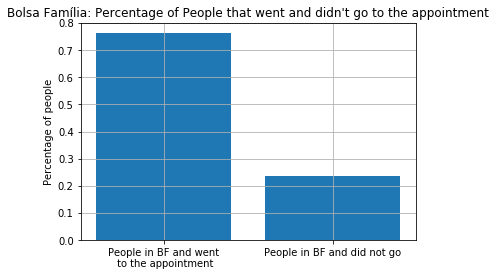

In [24]:
#Chart os people in the BF program - who went and who did not - in percentage
height = [ perc_group_go, perc_group_nogo]
location = [1,2]
labels = ['People in BF and went\n to the appointment', 'People in BF and did not go']
plt.bar(location, height, tick_label = labels)
plt.title("Bolsa Família: Percentage of People that went and didn't go to the appointment")
plt.grid(True)
plt.ylabel('Percentage of people');

##### Quick Conclusion:

- We can see that a major part of the people that are in the program go to the medical appointment.

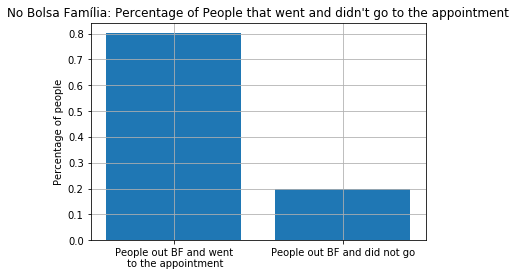

In [25]:
#Chart os people outside of the BF program - who went and who did not - in percentage
height = [ perc_out_go, perc_out_nogo]
location = [1,2]
labels = ['People out BF and went\n to the appointment', 'People out BF and did not go']
plt.bar(location, height, tick_label = labels)
plt.grid(True)
plt.title("No Bolsa Família: Percentage of People that went and didn't go to the appointment")
plt.ylabel('Percentage of people');

##### Quick conclusion: 

- In this chart, we can see that the rates of people outside the Bolsa Família Program (BF) is a little higher than the rate of people inside the BF Program.
- Let's make more analysis and see what we can conclude.

In [26]:
bf_df = df.query('Scholarship ==1')
#bf_df.shape (10861, 14)

In [27]:
bf_df['Age'].mean()

30.616241598379524

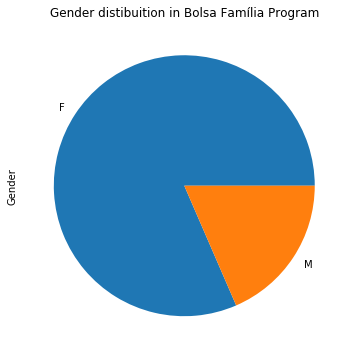

In [28]:
bf_df['Gender'].value_counts().plot(kind='pie',figsize=(6,6),title = 'Gender distibuition in Bolsa Família Program'); 


##### Quick conclusion:

 - Much more Females, what means, there are more moms than dads that are the only householder.

In [29]:
bf_df.groupby('no_show').Gender.value_counts()

no_show  Gender
No       F         6747
         M         1536
Yes      F         2106
         M          472
Name: Gender, dtype: int64

In [30]:
#Getting the number of women that went or not
woman = bf_df.query('Gender =="F"').no_show.value_counts()
woman
#Getting the number of men that went or not
man = bf_df.query('Gender =="M"').no_show.value_counts()

### PS: When reading the charts below, remember that 'No' means that the person went to the appointment, and 'Yes' means that he/she did not go.

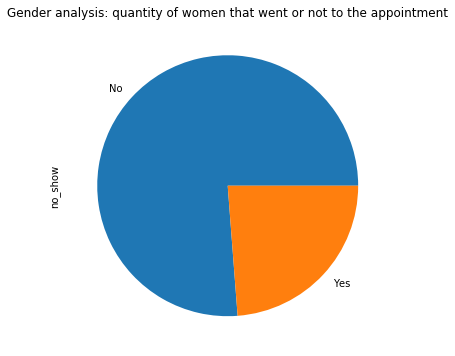

In [31]:
woman.plot(kind='pie',title = 'Gender analysis: quantity of women that went or not to the appointment', figsize=(6,6));

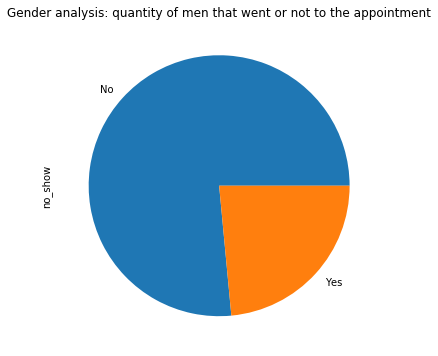

In [32]:
man.plot(kind='pie',title = 'Gender analysis: quantity of men that went or not to the appointment', figsize=(6,6));

#### Gender Distribuition and People that went to the appointment

> - The total people with Bolsa Família that went to the appoinment is 8283. 
     > - 6747 females (81.46%) 
     > - 1536 male (18.54%)

> - The total people with BF that did not go is 2578.
     > - 2106 females (81.70%) and,
     > - 472 males (18.30%).

#### We can see above that the rates are simmilar. 

### Below, let's take a look in SMS received and appearence to the appointment.

In [33]:
#Getting the number os SMS received among those who went and who did not
bf_df.groupby('no_show').sms_received.value_counts()

no_show  sms_received
No       0               5962
         1               2321
Yes      0               1394
         1               1184
Name: sms_received, dtype: int64

In [34]:
#C Pessoa que foi e recebeu SMS // Pessoa que não foi e recebeu SMS (Went and received SMS //Didnt go and received SMS)
sms_go = bf_df.query('sms_received =="1"').no_show.value_counts()
sms_go_total = sms_go.sum() #sum 3505
sms_go

No     2321
Yes    1184
Name: no_show, dtype: int64

In [35]:
#Getting percentages of C
porcen_nogo_sms_go = sms_go['Yes'] / sms_go_total
porcen_go_sms_go = sms_go['No'] / sms_go_total

print('SMS go and PPL go /// SMS go and PPL NO go')
porcen_go_sms_go*100, porcen_nogo_sms_go*100

SMS go and PPL go /// SMS go and PPL NO go


(66.21968616262482, 33.78031383737518)

#### Disclamer
 > The function below was an idea from the reviewer. I used the one he sent to me and adpted to others graphs.

In [36]:
#Making a function based on the comments of the reviewer.

def plot_func(h1, h2,label1,label2,title):
  height = [h1, h2]
  location = [1,2]
  label_sms = [label1, label2]
  plt.bar(location, height, tick_label = label_sms)
  plt.title(title)
  plt.grid(True)
  plt.ylabel('Percentage')

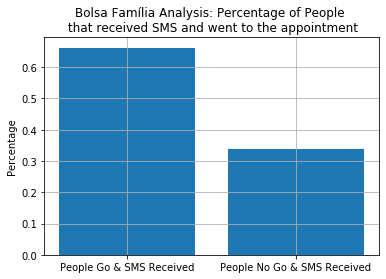

In [37]:
#using the function created above.
plot_func(porcen_go_sms_go,
          porcen_nogo_sms_go,
          'People Go & SMS Received',
          'People No Go & SMS Received',
          "Bolsa Família Analysis: Percentage of People \n that received SMS and went to the appointment")

##### Quick Conclusion: 

- The percentage of people in the BF Program that received SMS and went to the appointment is fine, around 65%.
- About 35% of people received SMS and did not go to the appointment. This might have a lot of social e economical variable. Let's see more.

In [38]:
#D Pessoa que foi e  não recebeu SMS // Pessoa que não foi e não recebeu SMS (No received SMS and went // No SMS and No go)
sms_nogo = bf_df.query('sms_received =="0"').no_show.value_counts()
sms_nogo_total = sms_nogo.sum() #7356
sms_nogo

No     5962
Yes    1394
Name: no_show, dtype: int64

In [39]:
#Getting percentages of D
porcen_nosms_go = sms_nogo['No'] / sms_nogo_total
porcen_nosms_nogo = sms_nogo['Yes'] / sms_nogo_total

print('SMS NO go and PPL go /// SMS NO go and PPL NO go')
porcen_nosms_go*100, porcen_nosms_nogo*100

SMS NO go and PPL go /// SMS NO go and PPL NO go


(81.0494834148994, 18.950516585100598)

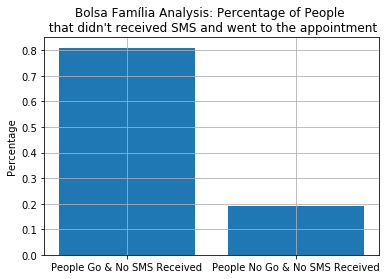

In [40]:
plot_func(porcen_nosms_go, 
          porcen_nosms_nogo,
          'People Go & No SMS Received', 
          'People No Go & No SMS Received',
          "Bolsa Família Analysis: Percentage of People \n that didn't received SMS and went to the appointment")

##### Quick Conclusion

- We can see that without SMSs received, the rates are higher. 

- About 80% did not received SMS and went to the appointment, while around 20% did not go and also didn't received.

- This might happen because these people are not constantly connected, don't have cellphnes/laptops, or live in areas without network, due their social-economical desabilities.

In [41]:
#Percentage of people that went to the appointment and SMS might have received
total_went = 8283

total_go_sms = sms_go['No'] / total_went
total_go_nosms = sms_nogo['No'] / total_went

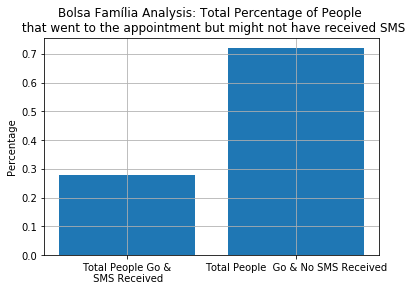

In [42]:
plot_func(total_go_sms, 
          total_go_nosms,
          'Total People Go &\n SMS Received', 
          'Total People  Go & No SMS Received',
          "Bolsa Família Analysis: Total Percentage of People \n that went to the appointment but might not have received SMS")

##### Quick conclusion:

- In here, we can see that there were more people going and didn't received SMS, in all BF Program. 
- We can think in 2 things: who organized the appointments didn't send enough SMSs or people in this program are not
    too much connected

In [43]:
total_nogo = 2578
total_nogo_sms = sms_go['Yes']/total_nogo
total_nogo_nosms = sms_nogo['Yes']/total_nogo

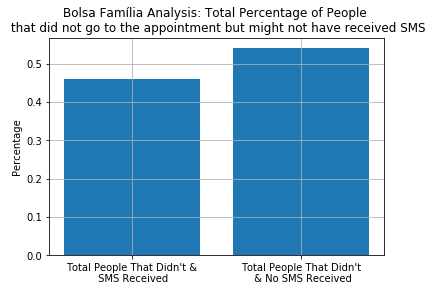

In [44]:
plot_func(total_nogo_sms, 
          total_nogo_nosms,
          "Total People That Didn't &\n SMS Received", 
          "Total People That Didn't\n & No SMS Received",
          "Bolsa Família Analysis: Total Percentage of People \n that did not go to the appointment but might not have received SMS")

##### Quick Conclusion: 

- This chart shows that people that didn't go and might have received SMS. 
- It shows that the SMS does make a little difference, since the % of the ones that received and did not go is smaller.

 ## Which group age tend to go to the medical appointment?

### Analyzing Age

In [45]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
label = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','+80']
df['age_group'] = pd.cut(df.Age, bins = bins, labels = label)


In [46]:
#GroupBy No Show and Age Group
ages_counts = df.groupby('no_show').age_group.value_counts()
ages_counts

no_show  age_group
No       51-60        12940
         0-10         12061
         31-40        11820
         41-50        11550
         21-30        10389
         11-20         9791
         61-70         9541
         71-80         4832
         +80           2137
Yes      21-30         3394
         11-20         3308
         31-40         3232
         0-10          3149
         41-50         2870
         51-60         2721
         61-70         1648
         71-80          889
         +80            407
Name: age_group, dtype: int64

In [47]:
#Total number of people per group age
ages_total = df.age_group.value_counts()
ages_total

51-60    15661
0-10     15210
31-40    15052
41-50    14420
21-30    13783
11-20    13099
61-70    11189
71-80     5721
+80       2544
Name: age_group, dtype: int64

In [48]:
#Age groups that go
ages_go = df.query('no_show=="No"').age_group.value_counts()
ages_go

51-60    12940
0-10     12061
31-40    11820
41-50    11550
21-30    10389
11-20     9791
61-70     9541
71-80     4832
+80       2137
Name: age_group, dtype: int64

In [49]:
#Age groups that dont go
ages_nogo = df.query('no_show=="Yes"').age_group.value_counts()
ages_nogo

21-30    3394
11-20    3308
31-40    3232
0-10     3149
41-50    2870
51-60    2721
61-70    1648
71-80     889
+80       407
Name: age_group, dtype: int64

In [50]:
range_list = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','+80']

In [51]:
df.head(0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,sms_received,no_show,age_group


In [52]:
#Creating functions to avoid repetition and find the percentages of the group ages that went or not to the appointment

def proportion_nogo(column):
    answer = []
    for range in range_list:
        prop = ages_nogo[range] / ages_total[range]
        answer.append(prop)
    return answer

def proportion_go(column):
    answer = []
    for range in range_list:
        prop = ages_go[range] / ages_total[range]
        answer.append(prop)
    return answer

#Here:

#range_list is a Python list of these values: [0-10], [11-20], [21-30] and so on.
#answer is an array of proportion ratios calculated for all range like this by replacing the entry in square brackets accordingly:
#nogo_proportion_0 = ages_nogo['0-10'] / ages_total['0-10']

In [53]:
x_nogo = proportion_nogo(range_list)
print(x_nogo)

[0.20703484549638396, 0.25253836170700056, 0.24624537473699484, 0.2147222960403933, 0.19902912621359223, 0.17374369452780794, 0.14728751452319241, 0.15539241391365147, 0.15998427672955975]


In [54]:
x_go = proportion_go(range_list)
print(x_go)

[0.792965154503616, 0.7474616382929995, 0.7537546252630052, 0.7852777039596067, 0.8009708737864077, 0.8262563054721921, 0.8527124854768076, 0.8446075860863486, 0.8400157232704403]


In [57]:
#making the function based on the the comment of the reviewer //updated
def groupage_func(h1, h2,h3,h4,h5,h6,h7,h8,h9,list_label,title):
  height = [h1, h2,h3,h4,h5,h6,h7,h8,h9]
  location = [1,2,3,4,5,6,7,8,9]
  list_label = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','+80']
  plt.bar(location, height, tick_label = label)
  plt.title(title)
  plt.grid(True)
  plt.ylabel('Percentage')


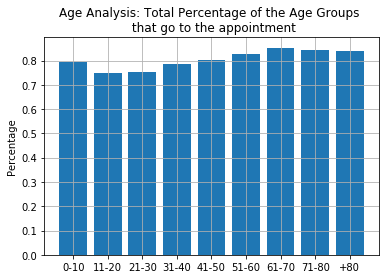

In [58]:
#Creating chart of group age % that went to the medical appointment
list_label = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','+80']
groupage_func(x_go[0],x_go[1],x_go[2],x_go[3],x_go[4],x_go[5],x_go[6],x_go[7],x_go[8],list_label,
              "Age Analysis: Total Percentage of the Age Groups \n that go to the appointment")


##### Quick conclusion:  

- The groups that represent the elderly people are those ones with a bigger tendency of not showing up to the medical
appointment.

- This might happen because they see the need to always get in touch with a doctor, to do medical check-ups.

- It's possible to notice that the children group have a very high rate. This can be related to the fact that children
gets sick often, and need a better look out.


   

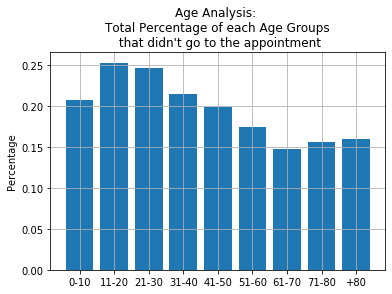

In [59]:
#Creating chart of group age % that did not go to the medical appointment
groupage_func(x_nogo[0],x_nogo[1],x_nogo[2],x_nogo[3],x_nogo[4],x_nogo[5],x_nogo[6],x_nogo[7],x_nogo[8],list_label,
              "Age Analysis: \nTotal Percentage of each Age Groups\n that didn't go to the appointment")

##### Quick conclusion:  

- The group age between 11-20 and 21-30 are those ones with a bigger tendency of not showing up to the medical appointment.

- This might happen due the fact that those groups are the house hold/work force.           


   

## What is the rate of people that recived SMS and went to the medical appointment?

#### First, I'll separate the data and then, make the variables to input the charts. The data will also be in percentage.

In [60]:
#GroupBy No Show and Age Group
sms_counts = df.groupby('sms_received').no_show.value_counts()
sms_counts

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

In [61]:
#Getting all people that went to the appointment but not all received SMS
sms_go = df.query('no_show=="No"').sms_received.value_counts()
sms_go

0    62510
1    25698
Name: sms_received, dtype: int64

In [62]:
#Total SMS sent and People that went to the appointment
sms_go.sum()

88208

In [63]:
#received sms and go to the appointment
received_go = sms_go[1]
received_go

25698

In [64]:
#no sms received and go to the appointment
noreceived_go = sms_go[0]
noreceived_go

62510

In [65]:
#getting percentages of those ones wether received SMS or no, and go to the appointment
received_go_porcentage = received_go / sum(sms_go)
noreceived_go_percentage = noreceived_go / sum(sms_go)

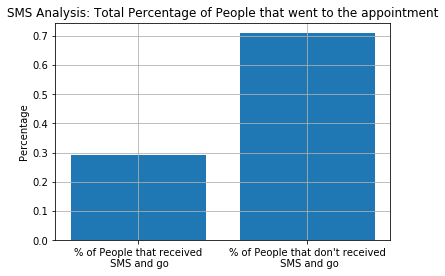

In [66]:
plot_func(received_go_porcentage, noreceived_go_percentage,
          '% of People that received\n SMS and go', 
          "% of People that don't received\n SMS and go",
         "SMS Analysis: Total Percentage of People that went to the appointment")

##### Quick conclusion: 

- We can see that a litle bit more than 70% didn't received SMS but still went to the appointment. While about 30% of people that received went to the appointment.

- I think that the total number of SMSs is not big enough, and could be bigger. W

In [67]:
#Getting all people that don not go to the appointment but not all received SMS
sms_nogo = df.query('no_show=="Yes"').sms_received.value_counts()
sms_nogo

0    12535
1     9784
Name: sms_received, dtype: int64

In [68]:
sms_nogo.sum()

22319

In [69]:
#received sms and no go to the appointment
received_nogo = sms_nogo[1]
received_nogo

9784

In [70]:
#no received sms and no go to the appointment
noreceived_nogo = sms_nogo[0]
noreceived_nogo

12535

In [71]:
#getting percentages of those ones wether received SMS or no, and go to the appointment
received_nogo_porcentage = received_nogo / sum(sms_nogo)
noreceived_nogo_percentage = noreceived_nogo / sum(sms_nogo)

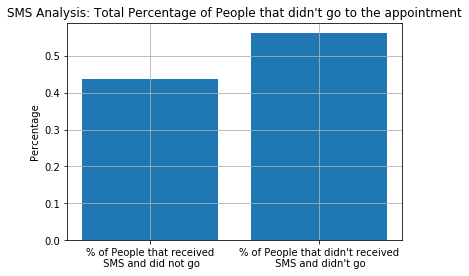

In [72]:
plot_func(received_nogo_porcentage, noreceived_nogo_percentage,
          '% of People that received\n SMS and did not go', 
          "% of People that didn't received\n SMS and didn't go",
         "SMS Analysis: Total Percentage of People that didn't go to the appointment")

##### Quick conclusion: 
- We can see that there's a small gap between those who went or not, but didn't received SMSs. 
- About 56% did not go and did not received, while 44% went to the appointment and did not received SMS.

<a id='limitations'></a>
## Limitations

> - I think that the data provided don't have enough variables to make a more precise prediction. I think this dataset is able to classify who go and who don't. 
>
> - The fact that not all people received SMS, for example, is a a variable not too much reliable, in my opinion. There are a lot of key factors that might interfer in the analysis, like social condition, living area and if there's a cellphone network.
>
> - The data set provided did not show any problem with missing values, but there's no strong relation between all variables.
> 
> - I couldn't see any relation or trend among diseases, like alcoholism, diabetes and the showing up to the appointment.



<a id='conclusions'></a>
## Conclusions



### Conclusion about Bolsa Família Members

- People with Bolsa Família don't tend to go to the medical appointments. The rate of this group is lower than the group that do not have this government support. This might occur due the economical and social desabilities.

#### Without Bolsa Família: 99 666
  >
 > - 79925 went to the appointment (80.20%)
 > - 19741 did not go (19.80%)

#### With Bolsa Família: 10 861
  >
 > - 8283 went to the appointment (76.26%) 
 > - 2578 did not go (23.73%)
  
- I tought that people with Scholarship/Bolsa Família would go a lot more to the appointments than others, but the rate of people that do not go with Government support is higher than those that does not receive support. The Bolsa Família program supports people in extreme poverty, and to go to medical appointments might make the family spend more money, that's why the rate of those who don't go is higher.

#### People with BF that received SMS

 - From all those ones that have been to the appointment (8283), 28% received SMS (2321), therefore 78% did not (5962).
 - From all those ones that have not been to the appointment (2578), 45.92% received SMS (1184), while 54.08% did not (1394). 
 - From all cases (10861), 67.72% didn't received SMS, therefore 32,28% received.. 


##### This high percentage of no-received SMSs can be linked to the lack of economic conditions of these people. Some of them might live in area that there's no cellphone signal, or so, don't have a cellphone device

### Conclusions about age
- We can see that the age groups 11-20 and 21-30 are the ones that miss the medical appointment. Around of 25% of those groups tend to not go. 


- The age group that go the most is 61-70, with 85% of appearence.Not far behind are the other two elderly groups: 71-80 (84.44%) and +80 (84.00%).

### Conclusion About SMSs

- We can see that the results of receive and go or not to the appointment is very simmilar to the Bolsa Família Analysis.


- There are more people that don't receive SMS but still go to the appointment. 


- SMSs does not seems to have a strong influece wether the person go or no to the appointment.

# What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

- Age
- Scholarship/Bolsa Família
- SMS

- These are the main factors that can predict weather a patient will show up or not. 

- Elderly people and those ones that received SMS tend to go to the appointment, even though a small percentege receive it.

- People in Bolsa Família Program have a smaller rate, and as I supposed above, this might happen due economic desabilities.





<li><a href="#table">Home</a></li>